In [1]:
# Playing with some event data

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
import numpy as np
from dateutil import parser

In [3]:
def date_sequences(path):
    """
    Parse a file of date events, with groups of events delimited by '--' markers.
    Emit (start-date, event-date) pairs for each event.
    """
    with open(path, 'r') as f:
        dates = []
        for line in f:
            line = line.strip()
            if line == '--':
                if dates:
                    dates = sorted(dates)
                    for d in dates:
                        yield (dates[0], d)
                    dates = []
            else:
                dp = int(parser.parse(line).strftime('%s'))
                dates.append(dp)
        if dates:
            dates = sorted(dates)
            for d in dates:
                yield (dates[0], d)

date_points = [ds for ds in date_sequences('events.txt')]

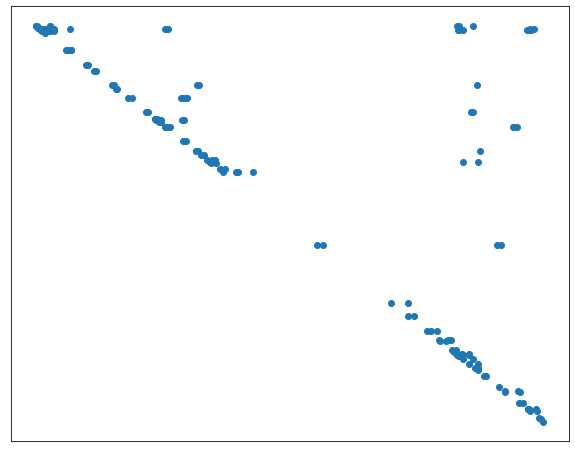

In [4]:
y = [-dp[0] for dp in date_points]  # negate to plot earliest-to-latest
x = [dp[1] for dp in date_points]
plt.scatter(x, y)

# TODO hide the axis labels until I have time to format them
ax = plt.gca()
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
